### Descriptive Analysis

Notebook for the descriptve analysis part.

In [2]:
from paths import ANNOTATED_DATA
import pandas as pd

df  = pd.read_excel(ANNOTATED_DATA)

C:\Users\zenod\AppData\Local\Temp\ipykernel_27356\3050776837.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
print(df.info())
cols = df.columns.to_list()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Columns: 129 entries, text to Emoji
dtypes: float64(117), int64(2), object(10)
memory usage: 525.2+ KB
None


,text,proc_text,A1,A2,A3,A4,A5,A6,majority_vote,roundID,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,Fuck you china. I was 2 years clear of severe ...,Fuck you china. I was 2 years clear of severe ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,26.92,7.69,3.85,0.00,0.00,3.85,11.54,0.00
1,Feeling so off today and I can’t tell if this ...,Feeling so off today and I can’t tell if this ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,28.00,12.00,0.00,0.00,0.00,8.00,8.00,16.00
2,Good lord people we need to stop having people...,Good lord people we need to stop having people...,PP,UN,PP,PO,PP,PP,PP,Round1,...,0.0,0.00,19.05,4.76,0.00,0.00,0.00,4.76,9.52,0.00
3,"I'm telling yall, Chill the fuck out!! This Vi...","I'm telling yall, Chill the fuck out!! This Vi...",PO,PO,PO,PO,PO,PP,PO,Round1,...,0.0,0.00,37.21,4.65,2.33,0.00,23.26,2.33,4.65,0.00
4,Episode of #CoronaVirus panic. Man took his gl...,Episode of #CoronaVirus panic. Man took his gl...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,1.72,20.69,10.34,5.17,0.00,0.00,3.45,1.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Stay physically fit &amp; healthy during self-...,Stay physically fit &amp; healthy during self-...,UN,PO,UN,UN,PO,UN,UN,Round2,...,0.0,0.00,37.50,12.50,2.50,0.00,0.00,0.00,22.50,0.00
517,"""I don’t panic when I go to a hospital and I’m...","""I don’t panic when I go to a hospital and I’m...",PO,PP,PP,PO,PP,UN,NoMajority,Round2,...,0.0,0.00,60.00,15.00,0.00,0.00,0.00,12.50,32.50,0.00
518,I have just uploaded my 11th video in my serie...,I have just uploaded my 11th video in my serie...,UN,PO,UN,UN,PO,UN,UN,Round2,...,0.0,0.00,32.50,5.00,5.00,0.00,0.00,5.00,17.50,0.00
519,#Part_1: #CORONAVIRUS &amp; #KASHMIR : Number ...,#Part_1: #CORONAVIRUS &amp; #KASHMIR : Number ...,PO,PO,PO,UN,PO,UN,PO,Round2,...,0.0,0.00,62.86,8.57,2.86,2.86,0.00,0.00,48.57,2.86


In [4]:
# constants
PP = 'PP'
PO = 'PO'
UN = 'UN'
NO = 'NoMajority'
NA = '?'

In [5]:
# proportion of the classifications
import seaborn as sns

df.A1 = df.A1.str.strip()
df.A2 = df.A2.str.strip()
df.A3 = df.A3.str.strip()
df.A4 = df.A4.str.strip()
df.A5 = df.A5.str.strip()
df.A6 = df.A6.str.strip()

a1_counts = df.A1.value_counts()
a2_counts = df.A2.value_counts()
a3_counts = df.A3.value_counts()
a4_counts = df.A4.value_counts()
a5_counts = df.A5.value_counts()
a6_counts = df.A6.value_counts()
counts = [a1_counts, a2_counts, a3_counts, a4_counts, a5_counts, a6_counts]

index = ['Annotator', UN, PO, PP, NA]
i = 1
df_data = []
for count in counts:
    data = [f'A{i}']
    data += count.values.tolist()
    df_data.append(data)
    i += 1
df_counts: pd.DataFrame = pd.DataFrame(data=df_data, columns=index)
df_counts

,Annotator,UN,PO,PP,?
0,A1,252,156,113,NaN
1,A2,375,71,66,9.0
2,A3,201,168,138,14.0
3,A4,237,182,101,1.0
4,A5,273,161,84,3.0
5,A6,174,173,149,25.0


Text(0.5, 1.0, 'Annotators count of predictions')

<Figure size 2000x800 with 0 Axes>

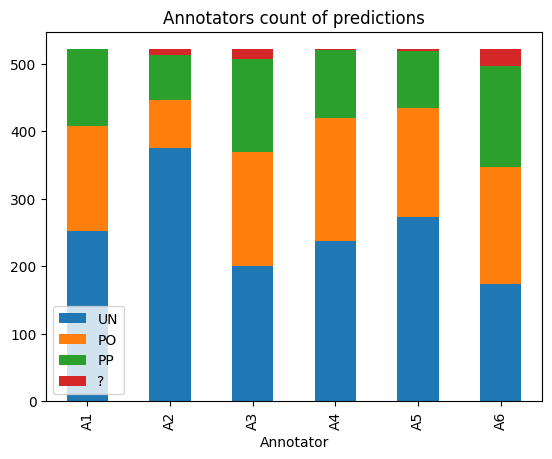

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
df_counts.plot(kind='bar', stacked=True, x='Annotator')
plt.title('Annotators count of predictions')

In [18]:
# annotator chosen prediction rate
chosen_times = pd.Series(data=[0]*6, index=[df_counts.Annotator])

chosen_times['A1'] = len(df[df.A1 == df.majority_vote])
chosen_times['A2'] = len(df[df.A2 == df.majority_vote])
chosen_times['A3'] = len(df[df.A3 == df.majority_vote])
chosen_times['A4'] = len(df[df.A4 == df.majority_vote])
chosen_times['A5'] = len(df[df.A5 == df.majority_vote])
chosen_times['A6'] = len(df[df.A6 == df.majority_vote])

print(chosen_times)

chosen_rate = chosen_times.copy()
chosen_rate = chosen_rate.apply(lambda x: x/len(df))

print(chosen_rate)

Annotator
A1           317
A2           217
A3           314
A4           313
A5           292
A6           249
dtype: int64
Annotator
A1           0.608445
A2           0.416507
A3           0.602687
A4           0.600768
A5           0.560461
A6           0.477927
dtype: float64


In [23]:
# count of 'NonMajority'
count_no = len(df[df.majority_vote == NO])
print('NonMajority: count = {}, rate = {:%}'.format(count_no, count_no/len(df)))

NonMajority: count = 168, rate = 32.245681%


In [31]:
# NonMajority correlation
df_maj = df.copy()
# 1 if there is a majority else 0
df_maj.majority_vote = df_maj.majority_vote.apply(lambda x: 0 if x == NO else 1)

from sklearn.ensemble import RandomForestClassifier

df_maj = df_maj.drop(columns=[
    'text',
    'proc_text',
    'A1',
    'A2',
    'A3',
    'A4',
    'A5',
    'A6'])
df_maj.roundID = df_maj['roundID'].replace({'Round1': 1, 'Round2': 0})
df_maj = df_maj.rename({'roundID': 'Round1'})

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


tr_X, ts_X, tr_y, ts_y = train_test_split(df_maj.drop(columns=['majority_vote']), df_maj['majority_vote'])

model = RandomForestClassifier()
model.fit(tr_X, tr_y)
model.feature_importances_

              precision    recall  f1-score   support

           0       0.56      0.12      0.20        41
           1       0.70      0.96      0.81        90

    accuracy                           0.69       131
   macro avg       0.63      0.54      0.51       131
weighted avg       0.66      0.69      0.62       131



C:\Users\zenod\AppData\Local\Temp\ipykernel_27356\451936016.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_maj.roundID = df_maj['roundID'].replace({'Round1': 1, 'Round2': 0})
